In [1]:
import qutip as qt
import numpy as np

# basis
g0,g1,e0,e1 = [qt.basis(4,i) for i in range(4)]

# set parameters (example)
gamma0, gamma1 = 1.0, 0.8
theta0, theta1 = np.pi/6, np.pi/4
phi0, phi1 = 0.0, np.pi/3

u0 = np.cos(theta0)*g0 + np.sin(theta0)*np.exp(1j*phi0)*g1
u1 = np.cos(theta1)*g0 + np.sin(theta1)*np.exp(1j*phi1)*g1

C0 = np.sqrt(gamma0) * (u0 * e0.dag())
C1 = np.sqrt(gamma1) * (u1 * e1.dag())

# choose b/a to annihilate g1 component (target g0)
ratio = - (np.sqrt(gamma0)*np.sin(theta0)*np.exp(1j*phi0)) / (np.sqrt(gamma1)*np.sin(theta1)*np.exp(1j*phi1))
a = 1.0
b = ratio * a
psi_e = (a*e0 + b*e1).unit()

# post-jump ground (unnormalized)
psi_g = C0 * psi_e + C1 * psi_e

# check proportionality to g0
print("psi_g (components):", (psi_g.overlap(g0), psi_g.overlap(g1)))


psi_g (components): ((0.4832500853485735-0.3396831102433787j), 2.7755575615628914e-17j)


Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
0.3420201433256687
Ratio: (-0.3639702342662023+0j)


/home/floresh2/.conda/envs/zm/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


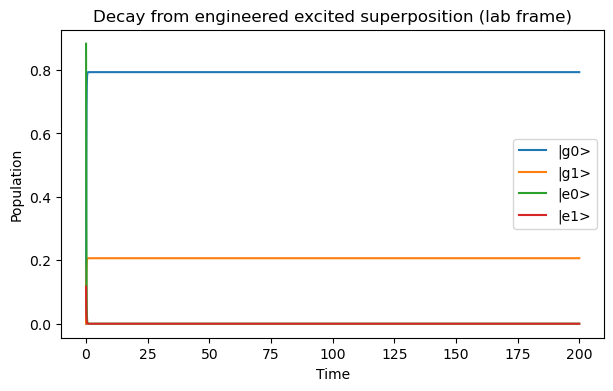

In [20]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# --- Basis states
g0, g1, e0, e1 = [qt.basis(4, i) for i in range(4)]

# --- Frequencies (GHz or arbitrary units)
optical_df = 2*np.pi*0.3
optical_fc = 2*np.pi*3.0
mw_ground = 2*np.pi*1.3
w_g0 = -mw_ground/2
w_g1 = mw_ground/2
w_e0 = optical_fc - optical_df/2 - mw_ground/2
w_e1 = optical_fc + optical_df/2 + mw_ground/2


# --- Hamiltonian (lab frame)
H = 0*(w_g1 * g1*g1.dag() +
     w_e0 * e0*e0.dag() +
     w_e1 * e1*e1.dag())
print(H)

# --- Decay parameters
gamma0, gamma1 = 10, 10
theta0, theta1 = 20*np.pi/180, 20*np.pi/180
phi0, phi1 = 0.0, 0.0

# --- Collapse operators (off-axis)
u0 = np.cos(theta0)*g0 + np.sin(theta0)*np.exp(1j*phi0)*g1
u1 = np.cos(theta1)*g1 + np.sin(theta1)*np.exp(1j*phi1)*g0
C0 = np.sqrt(gamma0) * (u0 * e0.dag()) 
C1 = np.sqrt(gamma1) * (u1 * e1.dag())


c_ops = [C0, C1]

# --- Choose excited superposition that decays to |g0>
print(np.sin(theta0))
ratio = -(np.sqrt(gamma0)*np.sin(theta0)*np.exp(1j*phi0)) / (np.sqrt(gamma1)*np.cos(theta1)*np.exp(1j*phi1))
psi_e = (e0 + ratio*e1).unit()
print(f'Ratio: {ratio}')
# --- Initial state: excited superposition
psi0 = psi_e

# --- Observables (populations)
proj_g0 = g0*g0.dag()
proj_g1 = g1*g1.dag()
proj_e0 = e0*e0.dag()
proj_e1 = e1*e1.dag()

# --- Time evolution
tlist = np.linspace(0, 200, 2001)
result = qt.mesolve(H, psi0, tlist, c_ops, [proj_g0, proj_g1, proj_e0, proj_e1])

# --- Plot populations
plt.figure(figsize=(7,4))
for i, label in enumerate(["|g0>", "|g1>", "|e0>", "|e1>"]):
    plt.plot(tlist, result.expect[i], label=label)
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("Decay from engineered excited superposition (lab frame)")
plt.show()


In [16]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# --- Basis states
g0, g1, e0, e1 = [qt.basis(4, i) for i in range(4)]

# --- Frequencies (arbitrary units)
optical_df = 0.01 * 2*np.pi   # small splitting so interference is visible
optical_fc = 3.0 * 2*np.pi
mw_ground = 1.3 * 2*np.pi
w_g0 = -mw_ground/2
w_g1 = mw_ground/2
w_e0 = optical_fc - optical_df/2 - mw_ground/2
w_e1 = optical_fc + optical_df/2 + mw_ground/2

# --- Hamiltonian (rotating frame, only splitting matters)
H = (w_g1 * g1*g1.dag() +
     w_e0 * e0*e0.dag() +
     w_e1 * e1*e1.dag())
H=0

# --- Decay parameters
gamma0, gamma1 = 0.005, 0.005       # small rates to see interference
theta0, theta1 = 20*np.pi/180, 20*np.pi/180
phi0, phi1 = 0.0, 0.0

# --- Collapse operators (separate)
u0 = np.cos(theta0)*g0 + np.sin(theta0)*np.exp(1j*phi0)*g1
u1 = np.cos(theta1)*g1 + np.sin(theta1)*np.exp(1j*phi1)*g0
C0 = np.sqrt(gamma0) * (u0 * e0.dag())
C1 = np.sqrt(gamma1) * (u1 * e1.dag())

c_ops = [C0, C1]  # separate operators

# --- Choose excited superposition that decays to |g0>
ratio = -(np.sqrt(gamma0)*np.sin(theta0)*np.exp(1j*phi0)) / \
        (np.sqrt(gamma1)*np.cos(theta1)*np.exp(1j*phi1))
psi_e = (e0 + ratio*e1).unit()

# --- Initial state
psi0 = psi_e

# --- Observables
proj_g0 = g0*g0.dag()
proj_g1 = g1*g1.dag()
proj_e0 = e0*e0.dag()
proj_e1 = e1*e1.dag()

# --- Time evolution
tlist = np.linspace(0, 200, 2001)
result = qt.mesolve(H, psi0, tlist, c_ops, [proj_g0, proj_g1, proj_e0, proj_e1])

# --- Plot
plt.figure(figsize=(7,4))
for i, label in enumerate(["|g0>", "|g1>", "|e0>", "|e1>"]):
    plt.plot(tlist, result.expect[i], label=label)
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("Decay from engineered excited superposition (interference visible)")
plt.show()


/home/floresh2/.conda/envs/zm/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


TypeError: QobjEvo terms should be Qobjs, a list of [Qobj, coefficient], or a function f(t: double, args: dict) -> Qobj, but received: 0

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=CSR, isherm=False
Qobj data =
[[0.         0.         0.19364917 0.        ]
 [0.         0.         0.1118034  0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=CSR, isherm=False
Qobj data =
[[0.         0.         0.         0.1118034 ]
 [0.         0.         0.         0.19364917]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=CSR, isherm=False
Qobj data =
[[0.         0.         0.19364917 0.1118034 ]
 [0.         0.         0.1118034  0.19364917]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.       ]
 [ 0.       ]
 [ 0.8660254]
 [-0.5      ]]


/home/floresh2/.conda/envs/zm/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


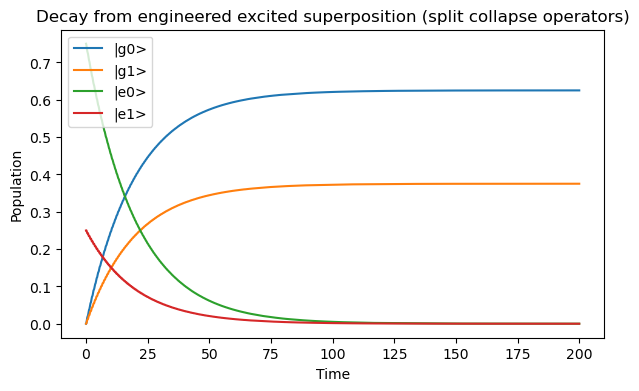

In [45]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# --- Basis states
g0, g1, e0, e1 = [qt.basis(4, i) for i in range(4)]

# --- Frequencies (arbitrary units)
optical_df = 2*np.pi*0.3
optical_fc = 2*np.pi*3.0
mw_ground = 2*np.pi*1.3
w_g0 = -mw_ground/2
w_g1 = mw_ground/2
w_e0 = optical_fc - optical_df/2 - mw_ground/2
w_e1 = optical_fc + optical_df/2 + mw_ground/2

# --- Hamiltonian (lab frame)
H = w_g1 * g1*g1.dag() + w_e0 * e0*e0.dag() + w_e1 * e1*e1.dag()

# --- Decay parameters
gamma0, gamma1 = 1/20, 1/20
theta0, theta1 = 30*np.pi/180, 30*np.pi/180
phi0, phi1 = 0.0, 0.0

# --- Collapse operators (split)
u0 = np.cos(theta0)*g0 + np.sin(theta0)*np.exp(1j*phi0)*g1
u1 = np.cos(theta1)*g1 + np.sin(theta1)*np.exp(1j*phi1)*g0

C0 = np.sqrt(gamma0) * u0 * e0.dag()
C1 = np.sqrt(gamma1) * u1 * e1.dag()
print(C0)
print(C1)
C_total = C0 + C1
print(C_total)
c_ops = [C_total]

# --- Choose excited superposition that decays to |g0>
ratio = -(np.sqrt(gamma0)*np.sin(theta0)*np.exp(1j*phi0)) / (np.sqrt(gamma1)*np.cos(theta1)*np.exp(1j*phi1))
psi_e = (e0 + ratio*e1).unit()

# --- Initial state
psi0 = psi_e
print(psi0)

# --- Observables (populations)
proj_g0 = g0*g0.dag()
proj_g1 = g1*g1.dag()
proj_e0 = e0*e0.dag()
proj_e1 = e1*e1.dag()

# --- Time evolution
tlist = np.linspace(0, 200, 2001)
result = qt.mesolve(H, psi0, tlist, c_ops, [proj_g0, proj_g1, proj_e0, proj_e1])

# --- Plot populations
plt.figure(figsize=(7,4))
for i, label in enumerate(["|g0>", "|g1>", "|e0>", "|e1>"]):
    plt.plot(tlist, result.expect[i], label=label)
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("Decay from engineered excited superposition (split collapse operators)")
plt.show()


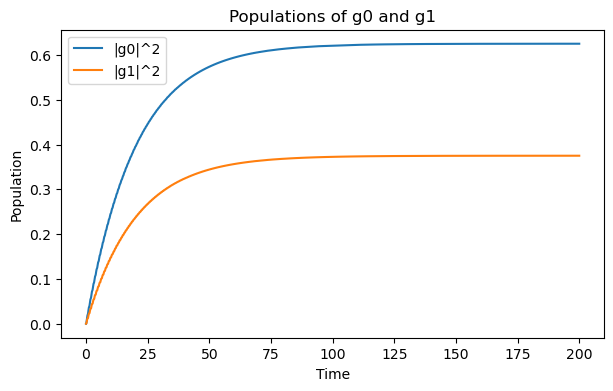

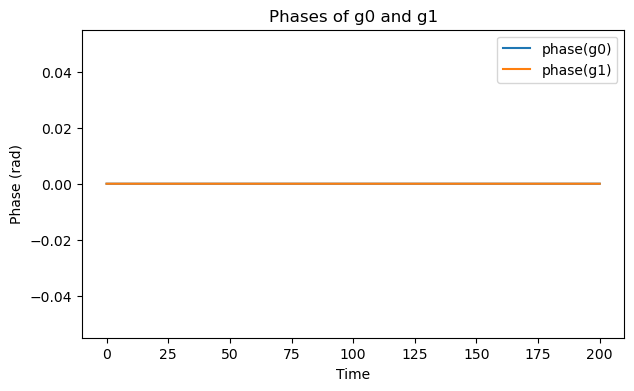

In [32]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# --- Basis states
g0, g1, e0, e1 = [qt.basis(4, i) for i in range(4)]

# --- Frequencies (arbitrary units)
optical_df = 2*np.pi*0.3
optical_fc = 2*np.pi*3.0
mw_ground = 2*np.pi*1.3
w_g0 = -mw_ground/2
w_g1 = mw_ground/2
w_e0 = optical_fc - optical_df/2 - mw_ground/2
w_e1 = optical_fc + optical_df/2 + mw_ground/2

# --- Hamiltonian (lab frame)
H = w_g1 * g1*g1.dag() + w_e0 * e0*e0.dag() + w_e1 * e1*e1.dag()

# --- Decay parameters
gamma0, gamma1 = 1/20, 1/20
theta0, theta1 = 30*np.pi/180, 30*np.pi/180
phi0, phi1 = 0.0, 0.0

# --- Collapse operators (split)
u0 = np.cos(theta0)*g0 + np.sin(theta0)*np.exp(1j*phi0)*g1
u1 = np.cos(theta1)*g1 + np.sin(theta1)*np.exp(1j*phi1)*g0
C0 = np.sqrt(gamma0) * u0 * e0.dag()
C1 = np.sqrt(gamma1) * u1 * e1.dag()
c_ops = [C0 + C1]

# --- Initial superposition
ratio = -(np.sqrt(gamma0)*np.sin(theta0)*np.exp(1j*phi0)) / (np.sqrt(gamma1)*np.cos(theta1)*np.exp(1j*phi1))
psi0 = (e0 + ratio*e1).unit()
# psi0 = -(e1).unit()


# --- Time evolution
tlist = np.linspace(0, 200, 20001)
result = qt.mesolve(H, psi0, tlist, c_ops)

# --- Extract g0 and g1 amplitudes
g0_amp = np.array([psi.overlap(g0) for psi in result.states])
g1_amp = np.array([psi.overlap(g1) for psi in result.states])

# --- Populations
g0_pop = np.abs(g0_amp)
g1_pop = np.abs(g1_amp)

# --- Phases
g0_phase = np.angle(g0_amp)
g1_phase = np.angle(g1_amp)

# --- Plot populations
plt.figure(figsize=(7,4))
plt.plot(tlist, g0_pop, label="|g0|^2")
plt.plot(tlist, g1_pop, label="|g1|^2")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("Populations of g0 and g1")
plt.show()

# --- Plot phases
plt.figure(figsize=(7,4))
plt.plot(tlist, g0_phase, label="phase(g0)")
plt.plot(tlist, g1_phase, label="phase(g1)")
plt.xlabel("Time")
plt.ylabel("Phase (rad)")
plt.legend()
plt.title("Phases of g0 and g1")
plt.show()


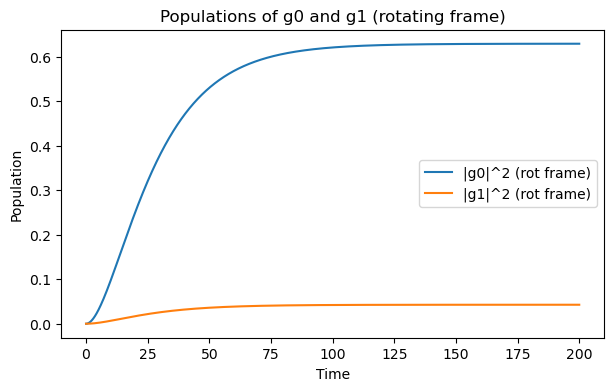

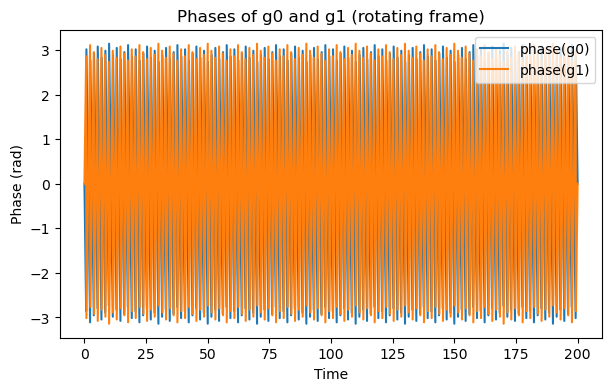

In [7]:

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# --- Basis states
g0, g1, e0, e1 = [qt.basis(4, i) for i in range(4)]

# --- Frequencies (arbitrary units)
optical_df = 2*np.pi*0.3
optical_fc = 2*np.pi*3.0
mw_ground = 2*np.pi*1.3
w_g0 = -mw_ground/2
w_g1 = mw_ground/2
w_e0 = optical_fc - optical_df/2 - mw_ground/2
w_e1 = optical_fc + optical_df/2 + mw_ground/2

# --- Hamiltonian (lab frame)
H = w_g1 * g1*g1.dag() + w_e0 * e0*e0.dag() + w_e1 * e1*e1.dag()

# --- Decay parameters
gamma0, gamma1 = 1/20, 1/20
theta0, theta1 = 20*np.pi/180, 20*np.pi/180
phi0, phi1 = 0.0, 0.0

# --- Collapse operators (split)
u0 = np.cos(theta0)*g0 + np.sin(theta0)*np.exp(1j*phi0)*g1
u1 = np.cos(theta1)*g1 + np.sin(theta1)*np.exp(1j*phi1)*g0
C0 = np.sqrt(gamma0) * u0 * e0.dag()
C1 = np.sqrt(gamma1) * u1 * e1.dag()
c_ops = [C0, C1]

# --- Initial superposition
ratio = -(np.sqrt(gamma0)*np.sin(theta0)*np.exp(1j*phi0)) / (np.sqrt(gamma1)*np.cos(theta1)*np.exp(1j*phi1))
psi0 = (e0 + ratio*e1).unit()

# --- Time evolution
tlist = np.linspace(0, 200, 2001)
result = qt.mesolve(H, psi0, tlist, c_ops)

# --- Transform to rotating frame (remove fast optical phase)
def to_rot_frame(amp, w, tlist):
    return amp * np.exp(1j*w*tlist)

# Extract amplitudes in lab frame
g0_amp = np.array([psi.overlap(g0) for psi in result.states])
g1_amp = np.array([psi.overlap(g1) for psi in result.states])

# Rotating frame amplitudes (remove energy-dependent phases)
g0_rot = to_rot_frame(g0_amp, w_g0, tlist)
g1_rot = to_rot_frame(g1_amp, w_g1, tlist)

# --- Populations
g0_pop = np.abs(g0_rot)**2
g1_pop = np.abs(g1_rot)**2

# --- Phases
g0_phase = np.angle(g0_rot)
g1_phase = np.angle(g1_rot)

# --- Plot populations
plt.figure(figsize=(7,4))
plt.plot(tlist, g0_pop, label="|g0|^2 (rot frame)")
plt.plot(tlist, g1_pop, label="|g1|^2 (rot frame)")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("Populations of g0 and g1 (rotating frame)")
plt.show()

# --- Plot phases
plt.figure(figsize=(7,4))
plt.plot(tlist, g0_phase, label="phase(g0)")
plt.plot(tlist, g1_phase, label="phase(g1)")
plt.xlabel("Time")
plt.ylabel("Phase (rad)")
plt.legend()
plt.title("Phases of g0 and g1 (rotating frame)")
plt.show()



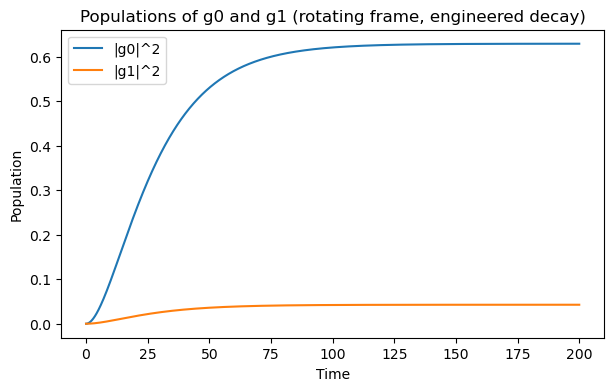

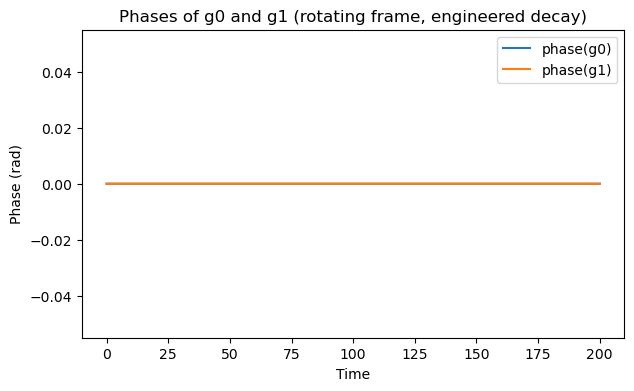

In [9]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# --- Basis states
g0, g1, e0, e1 = [qt.basis(4, i) for i in range(4)]

# --- Decay parameters
gamma0, gamma1 = 1/20, 1/20
theta = 20*np.pi/180  # same for both decay vectors

# --- Collapse operators (symmetric, mirror interference)
u0 = np.cos(theta)*g0 + np.sin(theta)*g1
u1 = np.sin(theta)*g0 + np.cos(theta)*g1
C0 = np.sqrt(gamma0) * u0 * e0.dag()
C1 = np.sqrt(gamma1) * u1 * e1.dag()
c_ops = [C0, C1]

# --- Initial superposition that decays purely to g0
ratio = - (np.sqrt(gamma0) * np.sin(theta)) / (np.sqrt(gamma1) * np.cos(theta))
psi0 = (e0 + ratio*e1).unit()

# --- Time evolution (zero Hamiltonian in rotating frame)
tlist = np.linspace(0, 200, 2001)
result = qt.mesolve(0*e0*e0.dag(), psi0, tlist, c_ops)

# --- Extract amplitudes
g0_amp = np.array([psi.overlap(g0) for psi in result.states])
g1_amp = np.array([psi.overlap(g1) for psi in result.states])

# --- Populations
g0_pop = np.abs(g0_amp)**2
g1_pop = np.abs(g1_amp)**2

# --- Phases
g0_phase = np.angle(g0_amp)
g1_phase = np.angle(g1_amp)

# --- Plot populations
plt.figure(figsize=(7,4))
plt.plot(tlist, g0_pop, label="|g0|^2")
plt.plot(tlist, g1_pop, label="|g1|^2")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("Populations of g0 and g1 (rotating frame, engineered decay)")
plt.show()

# --- Plot phases
plt.figure(figsize=(7,4))
plt.plot(tlist, g0_phase, label="phase(g0)")
plt.plot(tlist, g1_phase, label="phase(g1)")
plt.xlabel("Time")
plt.ylabel("Phase (rad)")
plt.legend()
plt.title("Phases of g0 and g1 (rotating frame, engineered decay)")
plt.show()


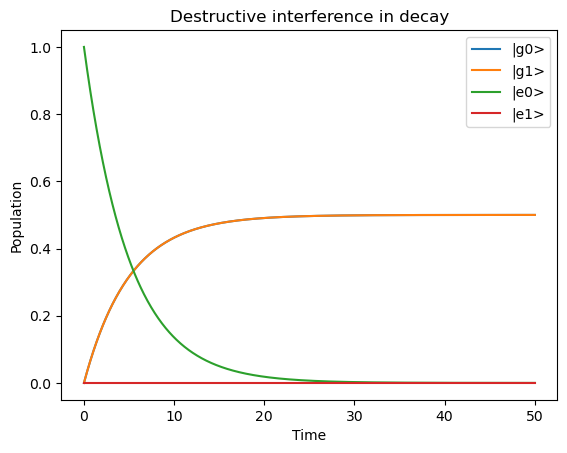

In [ ]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Basis states
g0, g1, e0, e1 = [qt.basis(4, i) for i in range(4)]

# Degenerate excited states
H = 0 * e0*e0.dag() + 0 * e1*e1.dag()

# Decay operators aligned to interfere destructively
gamma = 0.1
u0 = g0 + g1
u1 = g0 - g1
C0 = np.sqrt(gamma) * u0 * e0.dag()
C1 = np.sqrt(gamma) * u1 * e1.dag()
c_ops = [C0, C1]

# Initial state: equal superposition
psi0 = (e0 +1*e1).unit()

# Observables
proj_g0 = g0*g0.dag()
proj_g1 = g1*g1.dag()
proj_e0 = e0*e0.dag()
proj_e1 = e1*e1.dag()

# Time evolution
tlist = np.linspace(0, 50, 1000)
result = qt.mesolve(H, psi0, tlist, c_ops, [proj_g0, proj_g1, proj_e0, proj_e1])

# Plot
plt.plot(tlist, result.expect[0], label="|g0>")
plt.plot(tlist, result.expect[1], label="|g1>")
plt.plot(tlist, result.expect[2], label="|e0>")
plt.plot(tlist, result.expect[3], label="|e1>")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("Destructive interference in decay")
plt.show()
